In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('fhs_train.csv')
print(df.head())
print(df.isnull().sum())

   Unnamed: 0  sex  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1267    1   58        1.0              0         0.0     0.0   
1        1209    0   40        1.0              1        15.0     0.0   
2        2050    0   52        1.0              0         0.0     0.0   
3        1183    1   38        2.0              1        43.0     0.0   
4        3225    0   43        1.0              0         0.0     0.0   

   prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                0             0         0    220.0  143.0  104.0  29.85   
1                0             0         0    199.0  122.0   82.0  22.16   
2                0             0         0    275.0  112.0   71.0  25.68   
3                0             1         0    170.0  130.0   94.0  23.90   
4                0             0         0    202.0  124.0   92.0  21.26   

   heartRate  glucose  TenYearCHD  
0         75     87.0           1  
1         85     77.0           

In [18]:
"""
#taking out the missing values results in a r2 or 0.02
rows_with_nan = np.isnan(df).any(axis=1)
df = df[~rows_with_nan]

#replacing missing values with the median results in a r2 0f 0.027
df['education'].fillna(df['education'].median(), inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)
df['BPMeds'].fillna(df['BPMeds'].median(), inplace=True)
df['totChol'].fillna(df['totChol'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['glucose'].fillna(df['glucose'].median(), inplace=True)
print(df.isnull().sum())

for column in df.columns:
    sns.kdeplot(df[column], label=column, shade=True)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title(column)
    plt.legend()
    plt.show()
"""
#Using KNNImputer to fill in the missing values results in an r2 of 0.003
#BUT using KNN imputer and robust scaler results in an r2 of 0.073
#BUT using KNN imputer and standard scaler results in an r2 of 0.077
#Note to self: standard scaler only scales normal distributions... may want to dry different scaling distributions, like maxmin. 

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
imp = KNNImputer(n_neighbors=5)
ss = StandardScaler()
rs = RobustScaler()
print(df['TenYearCHD'].value_counts())
df = pd.DataFrame(imp.fit_transform(df), columns=df.columns)
#df = pd.DataFrame(rs.fit_transform(df), columns=df.columns)
df = pd.DataFrame(ss.fit_transform(df), columns=df.columns)
print(df.isna().sum())
print(df['TenYearCHD'].value_counts())
df['TenYearCHD'][df['TenYearCHD']<0]=0
df['TenYearCHD'][df['TenYearCHD']>0]=1
print(df['TenYearCHD'].value_counts())

TenYearCHD
0.0    2693
1.0     487
Name: count, dtype: int64
Unnamed: 0         0
sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64
TenYearCHD
-0.425252    2693
 2.351547     487
Name: count, dtype: int64
TenYearCHD
0.0    2693
1.0     487
Name: count, dtype: int64


In [19]:
from sklearn.model_selection import train_test_split
y = df['TenYearCHD']
X = df.drop('TenYearCHD',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

Best k: 42
R-squared of the best model: 0.07655026119733088


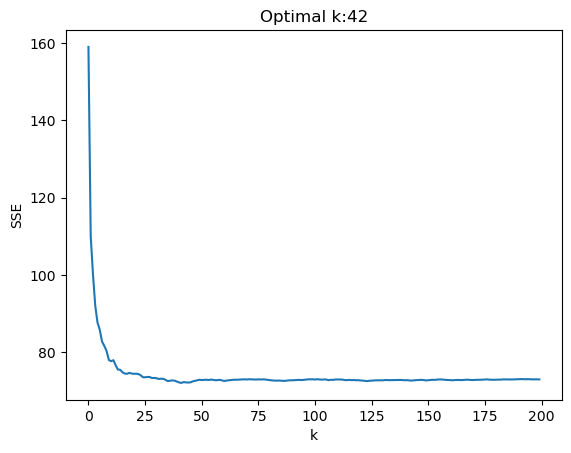

In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
k_bar = 200
k_grid = np.arange(1, k_bar)
SSE = np.zeros(k_bar)
r2_scores = np.zeros(k_bar)

for k in range(k_bar):
    fitted_model = KNeighborsRegressor(n_neighbors=k+1).fit(X_train, y_train)
    y_hat = fitted_model.predict(X_test)
    SSE[k] = np.sum((y_test - y_hat)**2)
    r2_scores[k] = r2_score(y_test, y_hat)

SSE_min = np.min(SSE)
min_index = np.where(SSE == SSE_min)
k_star = k_grid[min_index][0]
print("Best k:", k_star)

print("R-squared of the best model:", r2_scores[min_index][0])

plt.plot(np.arange(0, k_bar), SSE)
plt.xlabel("k")
plt.title("Optimal k:" + str(k_star))
plt.ylabel('SSE')
plt.show()
#not a very good r2... am going to have to make a lot of changes later on. 